<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


# Project Scenario
**Project Scenario**: You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.

 - Is there a significant difference in the median value of houses bounded by the Charles river or not?

 - Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

 - Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

 - What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

Using the appropriate graphs and charts, generate basic statistics and visualizations that you think will be useful for the upper management to give them important insight given the question they are asking, in your graphs, include an explanation of each statistic. 



## Task 1: Become familiar with the dataset

<details><summary>The following describes the dataset variables:</summary>

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per \$10,000
- PTRATIO - pupil-teacher ratio by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in \$1000's
</details>

## Task 2: Generate Descriptive Statistics and Visualizations

<details><summary>Generate the following and explain your findings:</summary>

For all visualizations, please include a title in each graph and appropriate labels

- For the "Median value of owner-occupied homes" provide a boxplot
- Provide a  bar plot for the Charles river variable
- Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
- Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
- Create a histogram for the pupil to teacher ratio variable

</details>

## Task 3: Use the appropriate tests to answer the questions provided

<details><summary>For each of the following questions:</summary>

- Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
- Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
- Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
- What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:
- State your hypothesis.
- Use α = 0.05
- Perform the test Statistics.
- State the conclusion from the test.

</details>

#### Import the required libraries we need for the lab.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

sns.set_theme("notebook")

#### Read the dataset in the csv file from the URL


In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

## Exploratory Data Analysis

In [3]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [4]:
boston_df = boston_df.drop(columns="Unnamed: 0")

In [5]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [6]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


<Axes: >

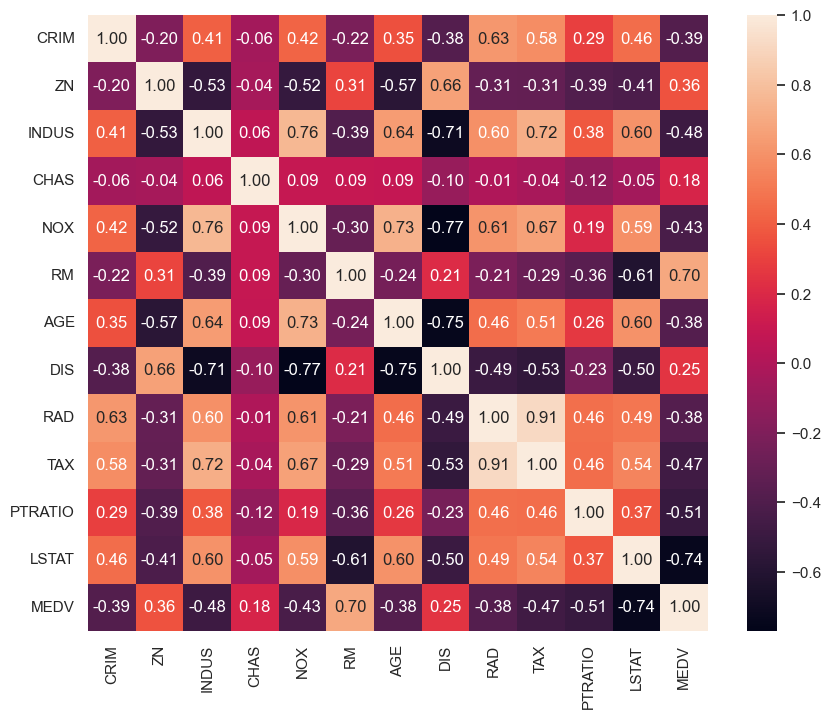

In [7]:
plt.figure(figsize=(10,8))
df_for_heatmap = boston_df.copy()
sns.heatmap(df_for_heatmap.corr(),annot=True,fmt='.2f')

## For the "Median value of owner-occupied homes" provide a boxplot

Text(0.5, 1.0, "Median value of owner-occupied homes ($1000's)")

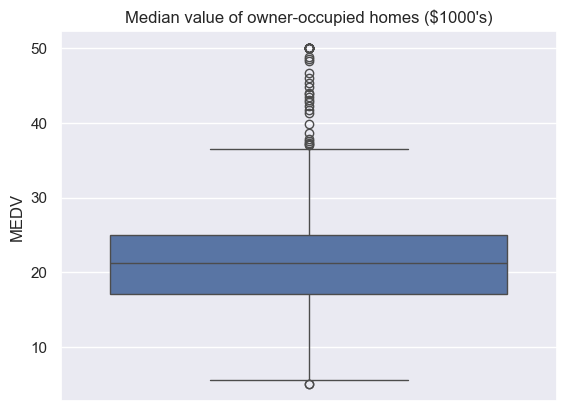

In [8]:
plt.figure()
sns.boxplot(y=boston_df["MEDV"])
plt.title("Median value of owner-occupied homes ($1000's)")

- Median of MEDV is about \$21,000.
- There are a lot of outliers above \$37,000, indicating there are large amounts of extremely high-value homes.

## Provide a bar plot for the Charles river variable

In [9]:
boston_df["CHAS"].value_counts()

CHAS
0.0    471
1.0     35
Name: count, dtype: int64

Text(0.5, 1.0, 'Proxmity to Charles River')

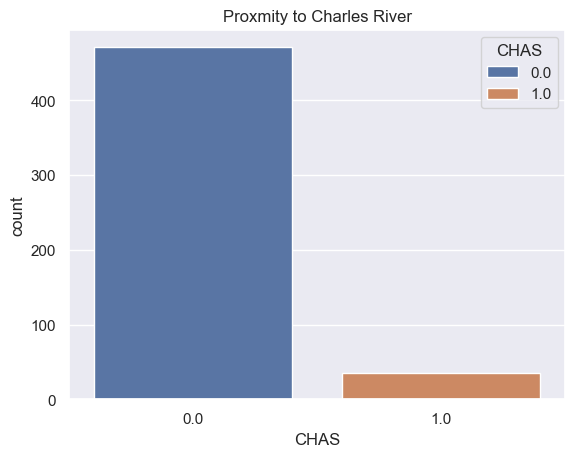

In [10]:
plt.figure()
sns.countplot(data=boston_df, x="CHAS", hue="CHAS")
plt.title("Proxmity to Charles River")

Text(0.5, 1.0, 'Average MEDV of houses on towns close to or far from Charles River')

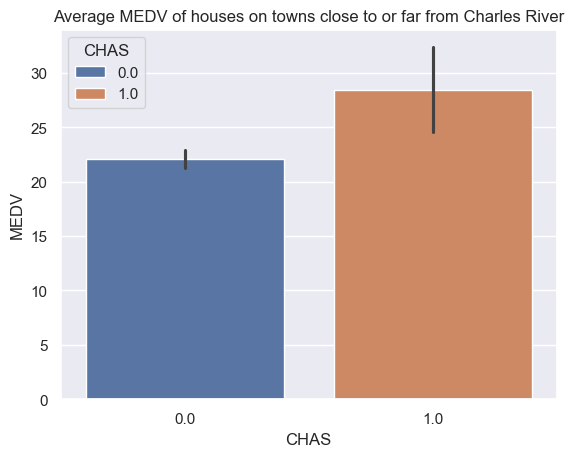

In [11]:
plt.figure()
sns.barplot(data=boston_df, x="CHAS", y="MEDV", hue="CHAS")
plt.title("Average MEDV of houses on towns close to or far from Charles River")

- Most of the towns are not bounded by the Charles River.
- The values of the houses in the town close to the Charles River are higher than those not.

## Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<font size = 3><strong>My Assumptions on AGE Variable</strong></font>
<br>
<br>
    Per description of the variable, "AGE" represents the proportion of owner-occupied units built prior to 1940. Therefore, the "AGE" variable here doesn’t represent the literal age of individual houses but instead gives an idea of the historical age of the housing stock in each town. A higher value in the "AGE" column (e.g., closer to 100%) indicates a larger percentage of homes that are older, while a lower value suggests a more modern housing profile. 
<br><br>

In this part, I will divide "AGE" into categories that represent towns with a higher or lower concentration of pre-1940 homes:

- **Low concentration of older homes (35% and below)** – representing areas with fewer homes built pre-1940.
- **Moderate concentration (35%-70%)** – areas with a mix of older and newer housing.
- **High concentration (above 70%)** – areas where the majority of homes were built before 1940.

</div>


In [12]:
mask_low = (boston_df["AGE"]<35) | (boston_df["AGE"]==35)
mask_moderate = (boston_df["AGE"]>35) & (boston_df["AGE"]<70)
mask_high = (boston_df["AGE"]>70) | (boston_df["AGE"]==70)

boston_df.loc[mask_low, 'AGE_group'] = "Low"
boston_df.loc[mask_moderate, 'AGE_group'] = "Moderate"
boston_df.loc[mask_high, 'AGE_group'] = "High"

mean_by_group = boston_df.groupby(['AGE_group'])['AGE'].mean().sort_values(ascending=True)
mean_by_group

AGE_group
Low         22.835165
Moderate    52.478906
High        90.256446
Name: AGE, dtype: float64

Text(0.5, 1.0, "Correlation between Median value of owner-occupied homes ($1000's) and AGE Groups")

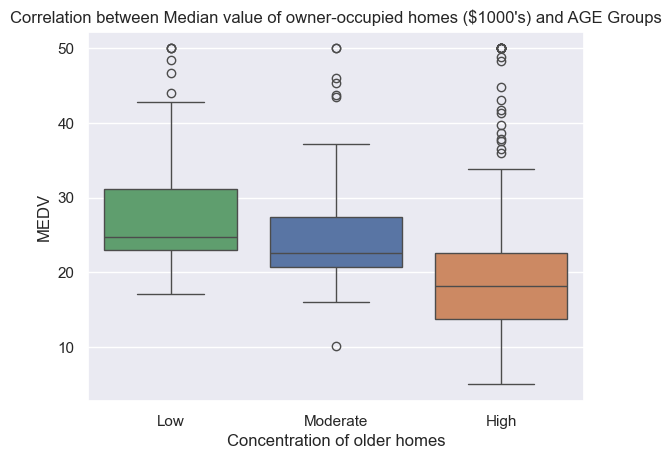

In [13]:
plt.figure()
sns.boxplot(data=boston_df, x="AGE_group", y="MEDV", hue="AGE_group", order=mean_by_group.index)
plt.xlabel("Concentration of older homes")
plt.ylabel("MEDV")
plt.title("Correlation between Median value of owner-occupied homes ($1000's) and AGE Groups")

- MEDV is correlated with the overall age of homes in the town: the younger the houses are, the more expansive they are.
- There are more outliers in each age group, consistent with what we found previously.

## Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Text(0.5, 1.0, 'Correlation between Nitric oxides concentration and Proportion of non-retail business')

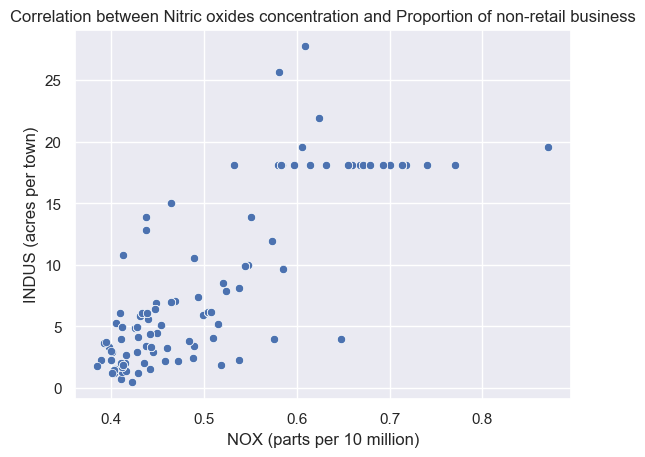

In [14]:
plt.figure()
sns.scatterplot(data=boston_df, x="NOX", y="INDUS")
plt.xlabel("NOX (parts per 10 million)")
plt.ylabel("INDUS (acres per town)")
plt.title("Correlation between Nitric oxides concentration and Proportion of non-retail business")

- INDUS is linearly positively correlated with NOX in the range of 0.38 to 0.58
- The linear relation does not hold for NOX greater than 0.58. This is likely due to existing regulation of limiting number of business in such hazardous areas.

## Create a histogram for the pupil to teacher ratio variable

Text(0.5, 1.0, 'Distribution of Pupil to Teacher Ratio')

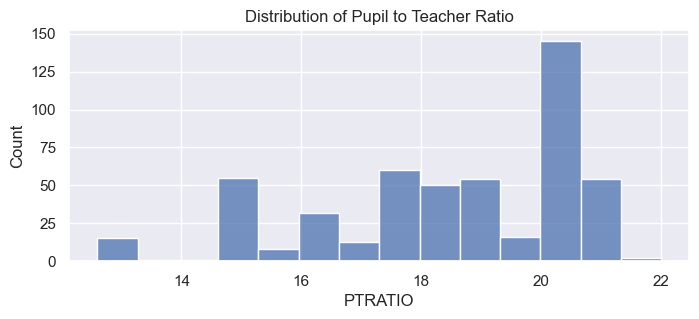

In [15]:
plt.figure(figsize=(8,3))
sns.histplot(data=boston_df["PTRATIO"])
plt.xlabel("PTRATIO")
plt.title("Distribution of Pupil to Teacher Ratio")

- Most towns has the pupil to teacher ratio of 20

# Testing Hypothesis

In [16]:
# Assuming alpha=0.05 for this part
alpha = 0.05

## Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

State the hypothesis
* $H_0: µ_1 = µ_2$ ("there is no difference in median value of houses based on proximity to Charles river")
* $H_1: µ_1 ≠ µ_2$ ("there is a difference in median value of houses based on proximity to Charles river")

In [17]:
boston_df["CHAS"].value_counts()

CHAS
0.0    471
1.0     35
Name: count, dtype: int64

In [18]:
close_to_CR = boston_df[boston_df["CHAS"] == 1]["MEDV"]
not_close_to_CR = boston_df[boston_df["CHAS"] == 0]["MEDV"]

levene_result = scipy.stats.levene(not_close_to_CR, close_to_CR, center="mean")
levene_pvalue = levene_result.pvalue
if levene_pvalue>alpha:
    print("p-value of Levene's test is {:.3f} > {:.3f}, fail to reject the null, assume equal variances".format(levene_pvalue, alpha))
else:
    print("p-value of Levene's test is {:.3f} < {:.3f}, reject the null, assume unequal variances".format(levene_pvalue, alpha))

p-value of Levene's test is 0.003 < 0.050, reject the null, assume unequal variances


In [19]:
ttest = scipy.stats.ttest_ind(not_close_to_CR, close_to_CR, equal_var = False)
ttest_pvalue = ttest.pvalue

if ttest_pvalue>alpha:
    print("p-value of t-test is {:.3f} > {:.3f}, fail to reject the null, there is no difference in median value of houses based on proximity to Charles river".format(ttest_pvalue, alpha))
else:
    print("p-value of t-test is {:.3f} < {:.3f}, reject the null, there is a significant difference in median value of houses based on proximity to Charles river".format(ttest_pvalue, alpha))

p-value of t-test is 0.004 < 0.050, reject the null, there is a significant difference in median value of houses based on proximity to Charles river


## Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

State the hypothesis
* $H_0: µ_1 = µ_2 = µ_3$ (the three groups means are equal)
* $H_1:$ At least one of the means differ

In [20]:
low_conc = boston_df[boston_df["AGE_group"] == "Low"]['MEDV']
moderate_conc = boston_df[boston_df["AGE_group"] == "Low"]['MEDV']
high_conc = boston_df[boston_df["AGE_group"] == "High"]['MEDV']

levene_result = scipy.stats.levene(low_conc, moderate_conc, high_conc, center="mean")
levene_pvalue = levene_result.pvalue
if levene_pvalue>alpha:
    print("p-value of Levene's test is {:.3f} > {:.3f}, fail to reject the null, assume equal variances".format(levene_pvalue, alpha))
else:
    print("p-value of Levene's test is {:.3f} < {:.3f}, reject the null, assume unequal variances".format(levene_pvalue, alpha))

p-value of Levene's test is 0.428 > 0.050, fail to reject the null, assume equal variances


In [21]:
anova = scipy.stats.f_oneway(low_conc, moderate_conc, high_conc)
anova_pvalue = anova.pvalue

if anova_pvalue>alpha:
    print("p-value of ANOVA is {:.3f} > {:.3f}, fail to reject the null, there is no difference in median value of houses based on age groups".format(anova_pvalue, alpha))
else:
    print("p-value of ANOVA is {:.3f} < {:.3f}, reject the null, there is a significant difference in median value of houses based on age groups".format(anova_pvalue, alpha))

p-value of ANOVA is 0.000 < 0.050, reject the null, there is a significant difference in median value of houses based on age groups


## Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

State the hypothesis:
* $H_0:$ Nitric oxide concentrations is not correlated with proportion of non-retail business acres per town
* $H_1:$ Nitric oxide concentrations is correlated with proportion of non-retail business acres per town


In [22]:
pearson = scipy.stats.pearsonr(boston_df["NOX"], boston_df["INDUS"])
pearson_pvalue = pearson.pvalue

if pearson_pvalue>alpha:
    print("p-value of Pearson Correlation is {:.3f} > {:.3f}, fail to reject the null, Nitric oxide concentrations is not correlated with proportion of non-retail business acres per town".format(pearson_pvalue, alpha))
else:
    print("p-value of Pearson Correlation is {:.3f} < {:.3f}, reject the null, Nitric oxide concentrations is correlated with proportion of non-retail business acres per town".format(pearson_pvalue, alpha))

p-value of Pearson Correlation is 0.000 < 0.050, reject the null, Nitric oxide concentrations is correlated with proportion of non-retail business acres per town


## What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Text(0.5, 1.0, 'Correlation between additional weighted distance to the five Boston employment centres and the median value of owner occupied homes')

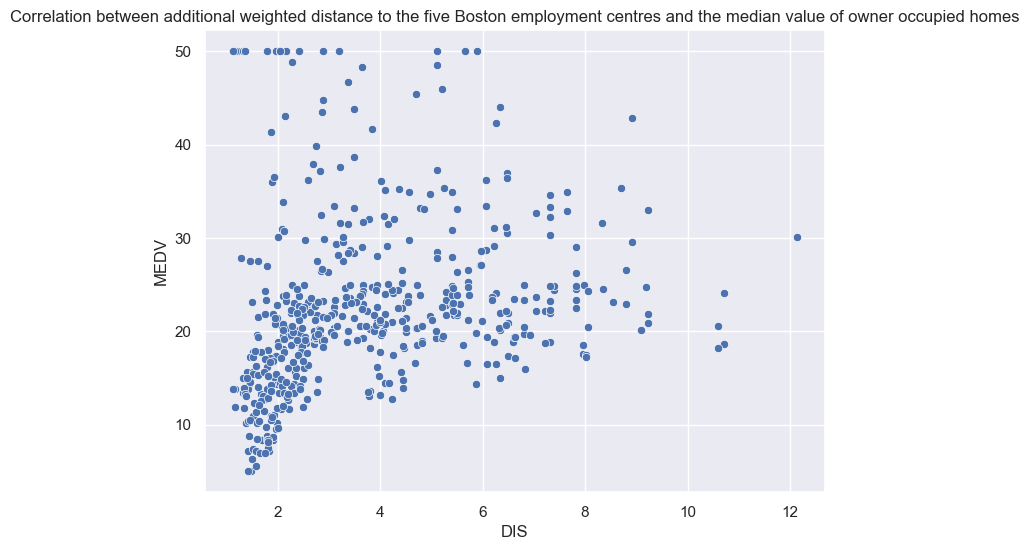

In [23]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=boston_df, x="DIS", y="MEDV")
plt.xlabel("DIS")
plt.ylabel("MEDV")
plt.title("Correlation between additional weighted distance to the five Boston employment centres and the median value of owner occupied homes")

In [24]:
X = boston_df["DIS"]
y = boston_df["MEDV"]

X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 30 Oct 2024   Prob (F-statistic):           1.21e-08
Time:                        14:54:12   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficient of DIS in the second table is 1.0916, with p-value 0.000, indicating that there's a significant positive correlation between DIS and MEDV. The increase of one additional weighted distance to the five Boston employment centres will increase 1.0916 times of the median value of owner occupied homes.